# Xgboost Classifier

In [1]:
import pandas as pd
df=pd.DataFrame({'Age':[24,32,41,29],'Salary':[21,120,90,80]})
df.head()

,Age,Salary
0,24,21
1,32,120
2,41,90
3,29,80


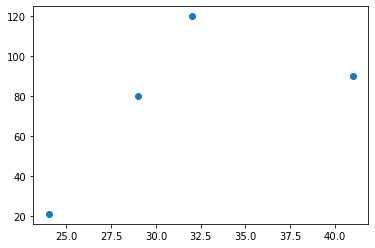

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df.Salary)

In [3]:
df.Salary.mean()

77.75

In [4]:
df['p0']=df.Salary.mean()

In [5]:
df

,Age,Salary,p0
0,24,21,77.75
1,32,120,77.75
2,41,90,77.75
3,29,80,77.75


In [6]:
df['res0']=df['Salary'] - df['p0']

In [7]:
df

,Age,Salary,p0,res0
0,24,21,77.75,-56.75
1,32,120,77.75,42.25
2,41,90,77.75,12.25
3,29,80,77.75,2.25


In [8]:
df.res0.sum()

0.0

In [10]:
from sklearn.datasets import load_boston
import numpy as np

In [11]:
!pip install xgboost

In [12]:
X,y=load_boston(return_X_y=True)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [14]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [15]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
xgb=XGBRegressor(ets=0.1,gamma=10)
gb=GradientBoostingRegressor()
rf=RandomForestRegressor()

In [17]:
from sklearn.model_selection import cross_val_score

In [22]:
print('XGBoost',np.mean(cross_val_score(xgb,X,y,cv=10)))
print('GradientBoost',np.mean(cross_val_score(gb,X,y,cv=10)))
print('RandomForest',np.mean(cross_val_score(rf,X,y,cv=10)))

[16:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, w

In [25]:
import time
start=time.time()

In [26]:
print('XGBoost',np.mean(cross_val_score(xgb,X,y,cv=10)))
print(time.time() - start)

[16:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, w

In [27]:
print('GradientBoost',np.mean(cross_val_score(gb,X,y,cv=10)))
print(time.time() - start)

GradientBoost 0.43635950053473654
50.66422939300537


In [28]:
print('RandomForest',np.mean(cross_val_score(rf,X,y,cv=10)))
print(time.time() - start)

RandomForest 0.47478201601859293
60.08864974975586


# Xgboost Regressor

In [29]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
# fill missing value in Age/Embarked
# OneHotEncoding Sex/Embarked
# train model

In [35]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [36]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [43]:
trf1= ColumnTransformer([
    ('impute', SimpleImputer(),[2]),
    ('impute2',SimpleImputer(strategy='most_frequent'),[6])
], remainder ='passthrough')
trf1.fit_transform(X_train)
trf1.transform(X_test)

array([[42.0, 'S', 1, ..., 0, 0, 26.2875],
       [21.0, 'S', 3, ..., 0, 0, 8.05],
       [24.0, 'S', 2, ..., 1, 2, 65.0],
       ...,
       [29.78590425531915, 'S', 3, ..., 8, 2, 69.55],
       [26.0, 'S', 3, ..., 0, 0, 7.8958],
       [29.0, 'S', 3, ..., 1, 1, 10.4625]], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder
trf2= ColumnTransformer([
    ('one', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,6])
])

In [47]:
from xgboost import XGBClassifier
clf=XGBClassifier()

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipe=Pipeline([
    ('step1',trf1),
    ('step2',trf2),
    ('step3',clf)
    
])

In [51]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  [2]),
                                                 ('impute2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('step2',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('step3',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constra

In [52]:
y_pred=pipe.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_pred)

0.6368715083798883

In [55]:
import pickle

In [58]:
pickle.dump(pipe,open('pipe.pk1','wb'))

In [59]:
pickle.load(open('pipe.pk1','rb'))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  [2]),
                                                 ('impute2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('step2',
                 ColumnTransformer(transformers=[('one',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('step3',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constra

In [64]:
pipe.predict(np.array([[1,'male',40,0,27,72,'C']],dtype=object))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([1])